In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston



import warnings
warnings.filterwarnings("ignore")

In [2]:
X = np.arange(4).reshape(2,2)
print("일차 단항식 계수 feature : \n", X)

poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 feature : \n", poly_ftr)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성, 즉 회귀식은 결정값 y = 1+2x_1 + 3x_1^2 + 4x_2^3

In [3]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:,0])
    print(X[:,1])
    return y

X = np.arange(0,4).reshape(2,2)

print("일차 단항식 계수 feature : \n", X, "\n")
y = polynomial_func(X)
print("일차 다항식 결정값 : \n", y)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]] 

[0 2]
[1 3]
일차 다항식 결정값 : 
 [  5 125]


3차 다항식 계수의 피쳐값과 3차 다항식 결정값으로 학습

In [4]:
from sklearn.linear_model import LinearRegression
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print("3차 다항식 계수 feature : \n", poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print("Polynomial 회귀 계수 :\n" ,np.round(model.coef_ , 2))
print("Polynomial 회귀 Shape : ", model.coef_.shape)

3차 다항식 계수 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 :
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape :  (10,)


In [5]:
from sklearn.pipeline import Pipeline

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

model = Pipeline([("poly", PolynomialFeatures(degree = 3)),
                 ("linear", LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print("Polynomial 회귀 계수 \n", np.round(model.named_steps["linear"].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 과제 1_0531
다항 회귀를 이용한 과소적합, 과대적합 비교 및 인사이트 도출을 위한 사례(교재 Page 332 ~ 336)을 코드로 구현하고 시사점을 요약해서 설명하시오.

In [6]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples) * 0.1

Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986834 입니다.
Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987231747 입니다.
Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE는 182815433.47648773 입니다.


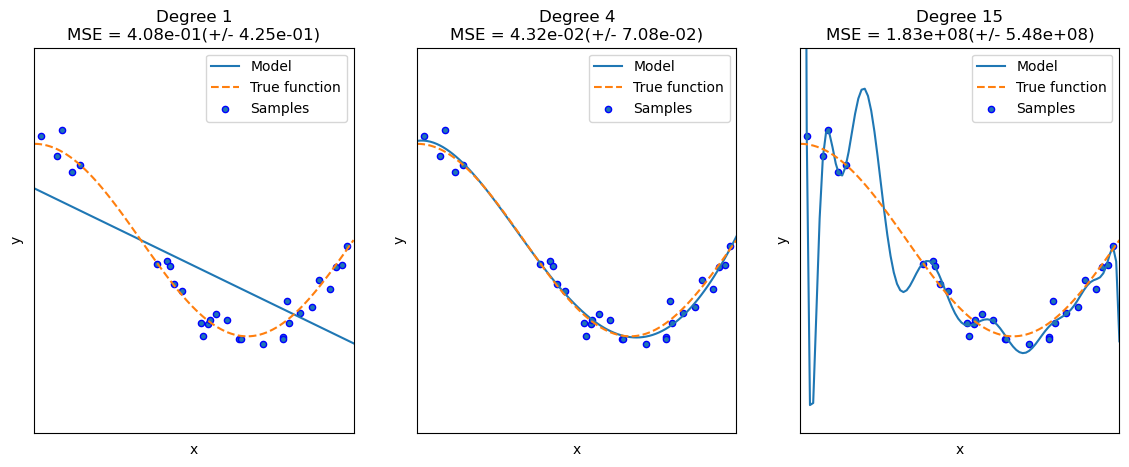

In [7]:
from sklearn.model_selection import cross_val_score

plt.figure(figsize = (14,5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks = (), yticks = ())
    
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    
    pipeline.fit(X.reshape(-1,1), y)
    
    
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = 10)
    
    coefficients = pipeline.named_steps["linear_regression"].coef_
    print(f"Degree {degrees[i]} 회귀 계수는 {np.round(coefficients,2)} 입니다.")
    print(f"Degree {degrees[i]} MSE는 {-1*np.mean(scores)} 입니다.")
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = "Model")
    
    plt.plot(X_test, true_fun(X_test), '--', label = "True function")
    plt.scatter(X, y, edgecolor = 'b', s = 20, label = "Samples")
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc = "best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(),scores.std()))

### Regularized Linear Model 

1. Lasso (Least Absolute Shrinkage and Selection Operator) Regression:

Lasso 회귀는 선형 회귀의 한 형태로, 특징 선택과 정규화를 함께 수행하여 최종 모델의 예측 성능을 향상시킵니다. Lasso는 목적 함수에 L1 패널티를 추가하여 일부 특징의 계수를 완전히 0으로 만듭니다. 이렇게 하면 덜 중요한 특징이 모델에서 제외되므로 특징 선택이 이루어집니다. 이 점은 고차원 데이터에서 유용합니다.

2. Ridge Regression:

Ridge 회귀도 선형 회귀의 한 형태로, L2 정규화를 사용합니다. L2 패널티는 모든 계수의 제곱을 합한 값을 목적 함수에 더하는 것을 의미합니다. 이로 인해 계수가 0이 되지는 않지만, 모델의 복잡성을 줄이고 다중공선성 문제를 완화하여 모델의 일반화 성능을 향상시킵니다.

3. Elastic Net Regression:

Elastic Net 회귀는 Lasso와 Ridge 회귀의 조합입니다. L1과 L2 패널티를 모두 사용하여 특징 선택의 이점과 복잡성 제어를 동시에 수행합니다. Elastic Net은 Lasso와 Ridge의 특징을 모두 가지므로, 적은 수의 특징이 관련성이 높을 때(Lasso)와 많은 수의 특징이 관련성이 높을 때(Ridge) 모두 좋은 성능을 보입니다.

이 세 가지 회귀 방법 모두 머신러닝 모델이 훈련 데이터에 과적합되는 것을 방지하는 데 도움이 됩니다. 이는 모델이 새로운, 이전에 보지 못한 데이터에 대해 더 잘 일반화하도록 돕습니다. 이들 방법은 사이킷런의 linear_model 모듈에 Lasso, Ridge, ElasticNet 클래스로 구현되어 있습니다.

In [13]:
boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF["PRICE"] = boston.target

y_target = bostonDF["PRICE"]
x_data = bostonDF.drop(["PRICE"], axis = 1, inplace = False)

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative Mse scores : ", np.round(neg_mse_scores, 3))
print(" 5 folds 의 개별 RMSE scores : ", np.round(rmse_scores,3))
print(" 5 folds 의 평균 RMSE : ", round(avg_rmse,3))

 5 folds 의 개별 Negative Mse scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE :  5.518


#### alpha 값을 0, 0.1, 1, 10, 100으로 변경하면서 RMSE 측정

In [15]:
for i in [0, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha = i)
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("alpha : ", i)
    print(" 5 folds 의 개별 Negative Mse scores : ", np.round(neg_mse_scores, 3))
    print(" 5 folds 의 개별 RMSE scores : ", np.round(rmse_scores,3))
    print(" 5 folds 의 평균 RMSE : ", round(avg_rmse,3))

alpha :  0
 5 folds 의 개별 Negative Mse scores :  [-12.46  -26.049 -33.074 -80.762 -33.314]
 5 folds 의 개별 RMSE scores :  [3.53  5.104 5.751 8.987 5.772]
 5 folds 의 평균 RMSE :  5.829
alpha :  0.1
 5 folds 의 개별 Negative Mse scores :  [-12.32  -25.198 -32.435 -80.703 -32.88 ]
 5 folds 의 개별 RMSE scores :  [3.51  5.02  5.695 8.983 5.734]
 5 folds 의 평균 RMSE :  5.788
alpha :  1
 5 folds 의 개별 Negative Mse scores :  [-11.711 -23.583 -29.693 -80.23  -31.116]
 5 folds 의 개별 RMSE scores :  [3.422 4.856 5.449 8.957 5.578]
 5 folds 의 평균 RMSE :  5.653
alpha :  10
 5 folds 의 개별 Negative Mse scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE :  5.518
alpha :  100
 5 folds 의 개별 Negative Mse scores :  [-12.825 -27.279 -34.68  -52.694 -22.051]
 5 folds 의 개별 RMSE scores :  [3.581 5.223 5.889 7.259 4.696]
 5 folds 의 평균 RMSE :  5.33


#### 각 alpha 값에 따른 회귀 계수 값을 시각화, 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

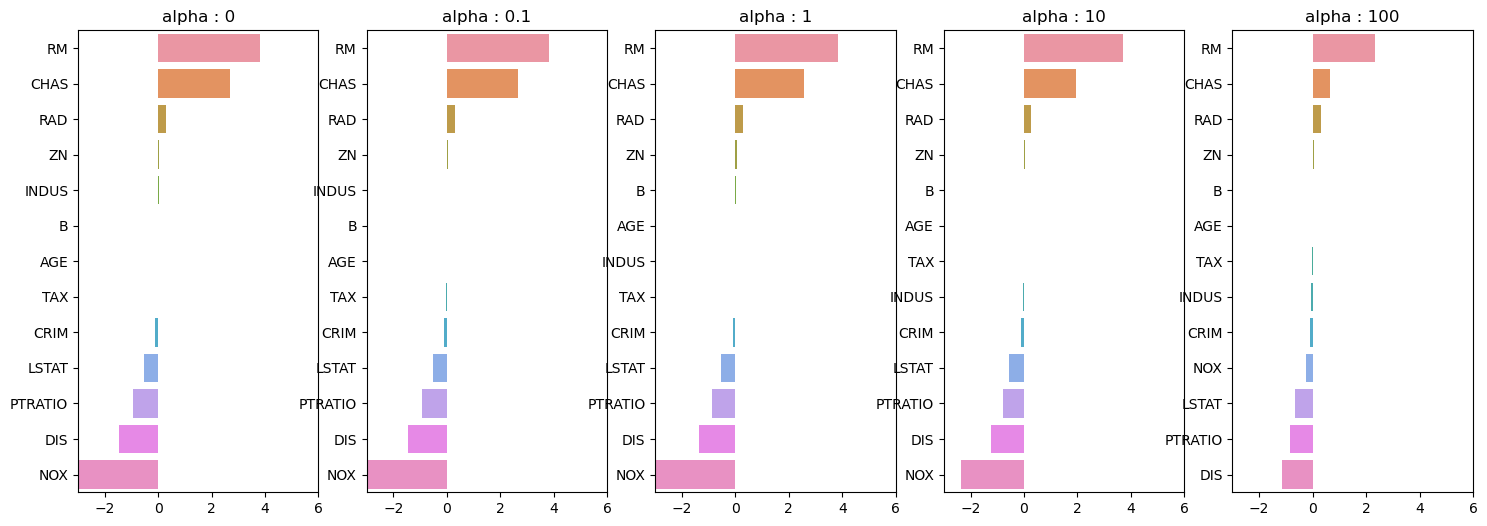

In [17]:
fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate([0, 0.1, 1, 10, 100]) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_data, y_target)
    coeff = pd.Series(data = ridge.coef_, index = x_data.columns)
    colname = "alpha : "+ str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])

In [19]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = "alpha : " + str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha : 0,alpha : 0.1,alpha : 1,alpha : 10,alpha : 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [20]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True, return_coeff = True):
    coeff_df = pd.DataFrame()
    if verbose : print("#######", model_name, "#######")
    for param in params:
        if model_name == "Ridge" : model = Ridge(alpha = param)
        elif model_name == "Lasso" : model = Lasso(alpha = param)
        elif model_name == "ElasticNet" : model = ElasticNet(alpha = param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = "neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        
        print(f"alpha {param}일 때 5폴드 세트의 평균 RMSE : {avg_rmse:.3f}")
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data = model.coef_, index = X_data_n.columns)
            colname = "alpha : " + str(param)
            coeff_df[colname] = coeff
    return coeff_df

In [25]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval("Lasso", params = lasso_alphas, X_data_n = x_data, y_target_n = y_target)

#######  Lasso #######
alpha 0.07일 때 5폴드 세트의 평균 RMSE : 5.612
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.615
alpha 0.5일 때 5폴드 세트의 평균 RMSE : 5.669
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.776
alpha 3일 때 5폴드 세트의 평균 RMSE : 6.189


In [24]:
sort_column = "alpha : " + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column, ascending = False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [26]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval("ElasticNet", params = elastic_alphas, X_data_n = x_data, y_target_n = y_target)

#######  ElasticNet #######
alpha 0.07일 때 5폴드 세트의 평균 RMSE : 5.542
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.526
alpha 0.5일 때 5폴드 세트의 평균 RMSE : 5.467
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.597
alpha 3일 때 5폴드 세트의 평균 RMSE : 6.068


In [27]:
sort_column = "alpha : " + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by = sort_column, ascending = False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [29]:
def get_scaled_data(method = "None", p_degree = None, input_data = None):
    if method == "Standard":
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == "MinMax":
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == "Log":
        scaled_data = np.log1p(input_data)
    else :
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree = p_degree,
                                        include_bias = False).fit_transform(scaled_data)
    return scaled_data

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ("Standard", None), ("Standard", 2),
                ("MinMax", None),("MinMax", 2),("Log", None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1], input_data = x_data)
    
    print(f"\n변환 유형 : {scale_method[0]}, Polynomial Degree : {scale_method[1]}")
    get_linear_reg_eval("Ridge", params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose = True, return_coeff = False)


변환 유형 : None, Polynomial Degree : None
#######  Ridge #######
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.788
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.653
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.518
alpha 100일 때 5폴드 세트의 평균 RMSE : 5.330

변환 유형 : Standard, Polynomial Degree : None
#######  Ridge #######
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.826
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.803
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.637
alpha 100일 때 5폴드 세트의 평균 RMSE : 5.421

변환 유형 : Standard, Polynomial Degree : 2
#######  Ridge #######
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 8.827
alpha 1일 때 5폴드 세트의 평균 RMSE : 6.871
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.485
alpha 100일 때 5폴드 세트의 평균 RMSE : 4.634

변환 유형 : MinMax, Polynomial Degree : None
#######  Ridge #######
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.764
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.465
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.754
alpha 100일 때 5폴드 세트의 평균 RMSE : 7.635

변환 유형 : MinMax, Polynomial Degree : 2
#######  Ridge #######
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.298
alpha 1일 때 5폴드 세트의 평균 RMSE : 4.323
alpha 10일 때 5폴드 세트의 평균 RMSE

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [40]:
cancer = load_breast_cancer()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state = 0)

In [44]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print("accuracy : ", round(accuracy_score(y_test, lr_preds), 4))
print("roc_auc : ", round(roc_auc_score(y_test, lr_preds), 4))

accuracy :  0.9766
roc_auc :  0.9716


In [47]:
solvers = ["lbfgs", "liblinear", "newton-cg", "sag", "saga"]

for solver in solvers:
    lr_clf = LogisticRegression(solver = solver, max_iter = 600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    
    print("\nsolver : ", solver)
    print("accuracy : ", round(accuracy_score(y_test, lr_preds), 4))
    print("roc_auc : ", round(roc_auc_score(y_test, lr_preds), 4))


solver :  lbfgs
accuracy :  0.9766
roc_auc :  0.9716

solver :  liblinear
accuracy :  0.9825
roc_auc :  0.9795

solver :  newton-cg
accuracy :  0.9766
roc_auc :  0.9716

solver :  sag
accuracy :  0.9825
roc_auc :  0.9795

solver :  saga
accuracy :  0.9825
roc_auc :  0.9795


In [49]:
from sklearn.model_selection import GridSearchCV

params = {"solver" : ["liblinear", "lbfgs"],
         "penalty" : ['l2','l1'],
         "C" : [0.01, 0.1, 1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = "accuracy", cv = 3)
grid_clf.fit(data_scaled, cancer.target)

print(f"최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {grid_clf.best_score_:.4f}")

최적 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도 : 0.9789
